In [1]:
import os
import katdal
import katpoint
%pylab inline
import scape
import string
import time
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.WARNING)

Populating the interactive namespace from numpy and matplotlib


In [2]:
name = '1659873530' #'1607433065'  # e.g 1583650035
file_=str('http://archive-gw-1.kat.ac.za:7480/'+name+'/'+name+'_sdp_l0.full.rdb')
rdb = katdal.open(file_)
#print(rdb)

In [3]:
len(rdb.ants)


58

In [5]:
def data_cal(file, nd_models, pol):
    
    ant_len = len(file.ants)
    ants = [file.ants[i].name for i in range(ant_len)]
    #ants = ['m049', 'm050','m058']
    ants.remove('m060')
    ants.remove('m002')
    ants.remove('m026')
    ants.remove('m050')
    ants.remove('m058')
    
    angle_sep = {}
    temp = {}
    for ant in range(ant_len-5):
        if ants[ant] == 'm050':
            data = scape.DataSet(file, baseline="%s" % (ants[ant]), nd_models='katconfig/user/noise-diode-models/mkat/nd_model_m050')
        elif ants[ant] == 'm058':
            data = scape.DataSet(file, baseline="%s" % (ants[ant]), nd_models='katconfig/user/noise-diode-models/mkat/nd_model_m058')
        else:
            data = scape.DataSet(file, baseline="%s" %(ants[ant]), nd_models=nd_models)
        
        data = data.convert_power_to_temperature()
        data = data.select(flagkeep='~nd_on') #removing the noise diode
        data = data.select(labelkeep='scan')  #keeps the scan and remove anything at the end
    
        angle_sep[ants[ant]] = np.sqrt(np.sum((np.degrees(data.scans[0].target_coords))**2,axis=0))
        temp[ants[ant]] = data.scans[0].pol(2*pol.upper()).mean(axis=1)    
        
    return angle_sep, temp, data, ants

%store -r angle 
%store -r temp

In [6]:
nd_model ='katconfig/user/noise-diode-models/mkat'
angle, temp, data, ants = data_cal(rdb, nd_model, 'h')

/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))
/scratch2/l

/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))
/scratch2/l

/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth

/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/l

/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  ga

/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/l

/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:489: RuntimeWarning: invalid value encountered in sqrt
  gain_hv = np.sqrt(smooth_gain_hh * smooth_gain_vv * (smooth_delta_re_hv ** 2 + smooth_delta_im_hv ** 2))


In [7]:
import pandas as pd

df = pd.DataFrame.from_dict(angle)
df1 = pd.DataFrame.from_dict(temp)

df.to_csv (r'S0band_angle.csv', index = False, header=True)
df1.to_csv (r'S0band_temp.csv', index = False, header=True)

In [7]:
ant_len = len(rdb.ants)

ants = [rdb.ants[i].name for i in range(58)]
ants.remove('m060')
ants.remove('m002')
ants.remove('m024')
ants.remove('m026')
ants.remove('m050')
ants.remove('m058')

print(ants)

['m000', 'm001', 'm003', 'm004', 'm005', 'm006', 'm007', 'm009', 'm010', 'm012', 'm013', 'm014', 'm015', 'm016', 'm017', 'm018', 'm019', 'm020', 'm022', 'm023', 'm025', 'm027', 'm028', 'm029', 'm030', 'm031', 'm032', 'm033', 'm034', 'm035', 'm036', 'm037', 'm038', 'm040', 'm041', 'm042', 'm044', 'm045', 'm046', 'm047', 'm049', 'm051', 'm052', 'm053', 'm054', 'm055', 'm056', 'm057', 'm059', 'm061', 'm062', 'm063']


In [32]:
temp[]

{'m000': array([23.777554, 23.778522, 23.772789, 23.770628, 23.763428, 23.759415,
        23.753963, 23.74934 , 23.753242, 23.759579, 23.765816, 23.76646 ,
        23.769207, 23.7738  , 23.786955, 23.80679 , 23.818241, 23.836906,
        23.860353, 23.878284, 23.913454, 23.942013, 23.962755, 23.98264 ,
        24.003193, 24.021248, 24.038101, 24.0542  , 24.076773, 24.106918,
        24.131298, 24.16356 , 24.196293, 24.223135, 24.261461, 24.298237,
        24.341553, 24.385511, 24.428944, 24.482471, 24.538105, 24.615074,
        24.694805, 24.767555, 24.820576, 24.836187, 24.852484, 24.90364 ,
        25.02856 , 25.206974, 25.428036, 25.640629, 25.860756, 26.137175,
        26.484026, 26.830631, 27.165482, 27.586863, 28.455996, 30.278442,
        33.125435, 37.253006, 41.269653, 45.96815 , 54.133904, 68.60672 ,
        76.86284 , 78.21702 , 79.128624, 79.75018 , 80.11133 , 80.27777 ,
        80.324814, 80.32053 , 80.305626, 80.28852 , 80.27064 , 80.24631 ,
        80.21073 , 80.11124 , 

In [28]:
numpy.where(temp.values()


dict_values([array([23.777554, 23.778522, 23.772789, 23.770628, 23.763428, 23.759415,
       23.753963, 23.74934 , 23.753242, 23.759579, 23.765816, 23.76646 ,
       23.769207, 23.7738  , 23.786955, 23.80679 , 23.818241, 23.836906,
       23.860353, 23.878284, 23.913454, 23.942013, 23.962755, 23.98264 ,
       24.003193, 24.021248, 24.038101, 24.0542  , 24.076773, 24.106918,
       24.131298, 24.16356 , 24.196293, 24.223135, 24.261461, 24.298237,
       24.341553, 24.385511, 24.428944, 24.482471, 24.538105, 24.615074,
       24.694805, 24.767555, 24.820576, 24.836187, 24.852484, 24.90364 ,
       25.02856 , 25.206974, 25.428036, 25.640629, 25.860756, 26.137175,
       26.484026, 26.830631, 27.165482, 27.586863, 28.455996, 30.278442,
       33.125435, 37.253006, 41.269653, 45.96815 , 54.133904, 68.60672 ,
       76.86284 , 78.21702 , 79.128624, 79.75018 , 80.11133 , 80.27777 ,
       80.324814, 80.32053 , 80.305626, 80.28852 , 80.27064 , 80.24631 ,
       80.21073 , 80.11124 , 79.8546  

In [87]:
from operator import itemgetter

ant_len = len(rdb.ants)

ants = [rdb.ants[i].name for i in range(58)]

rm =['m017', 'm022', 'm028', 'm033', 'm034', 'm035', 'm036', 'm037', 'm044', 'm045', 
     'm049', 'm053', 'm055', 'm056', 'm057', 'm061', 'm062', 'm063']
for index, ant in enumerate(ants):
    if ant in rm:
        ants.remove(ant)
ants.remove('m034')
ants.remove('m045')
ants.remove('m056')
ants.remove('m062')
ants.remove('m060')
ants.remove('m002')
ants.remove('m024')
ants.remove('m026')
ants.remove('m050')
ants.remove('m058')
ants.remove('m012')
ants.remove('m014')
ants.remove('m016')

print(ants)

def ant_stats(ants, angle, temp):

    ant_temp = []
    ant_angle = []
    ant_std = {}
    ant_mean = {}
    for ant in ants:
        ant_std[ant] = std(temp[ant])
        ant_mean[ant] = mean(temp[ant])
        ant_temp.append(temp[ant])
        ant_angle.append(angle[ant])
    
    
    bin_temp = []
    bin_angle = []
    for i in range(178):
        bin_temp.append(list(map(itemgetter(i), ant_temp)))
        bin_angle.append(list(map(itemgetter(i), ant_angle)))

    mean_temp = []
    std_temp = []
    mean_angle = []
    for ind in range(178):
        m_t = mean(bin_temp[ind])
        s_t = std(bin_temp[ind])
        m_a = mean(bin_angle[ind])
        
        mean_temp.append(m_t)
        std_temp.append(s_t)
        mean_angle.append(m_a)
        
    mean_temp = array(mean_temp)
    std_temp = array(std_temp)
    mean_angle = array(mean_angle)
        
    return mean_temp, std_temp, mean_angle


['m000', 'm001', 'm003', 'm004', 'm005', 'm006', 'm007', 'm009', 'm010', 'm012', 'm013', 'm014', 'm015', 'm016', 'm018', 'm019', 'm020', 'm023', 'm025', 'm027', 'm029', 'm030', 'm031', 'm032', 'm036', 'm038', 'm040', 'm041', 'm042', 'm046', 'm047', 'm051', 'm052', 'm054', 'm059']


In [91]:
nbins     = 20
ant_len = len(rdb.ants)
ants = [rdb.ants[i].name for i in range(58)]

rm =['m017', 'm022', 'm028', 'm033', 'm034', 'm035', 'm036', 'm037', 'm044', 'm045', 
     'm049', 'm053', 'm055', 'm056', 'm057', 'm061', 'm062', 'm063']
for index, ant in enumerate(ants):
    if ant in rm:
        ants.remove(ant)
ants.remove('m034')
ants.remove('m045')
ants.remove('m056')
ants.remove('m062')
ants.remove('m060')
ants.remove('m002')
ants.remove('m024')
ants.remove('m026')
ants.remove('m050')
ants.remove('m058')
ants.remove('m012')
ants.remove('m014')
ants.remove('m016')

mean_temp, std_temp, mean_angle = ant_stats(ants, angle, temp)

#creating list of zeros using bin as size[x-values, y-values, standard deviation values]
xv       = zeros(nbins)
yv       = zeros(nbins)
sv       = zeros(nbins)

#calculating stats
mean_temp, std_temp, mean_angle = ant_stats(ants, angle, temp)

#creating values representing the x-axis 
bins     = linspace(min(mean_angle),max(mean_angle), nbins)
#print(bins)

#returing the indexes of all the values according to the binning
angle_ind  = digitize(mean_angle, bins) -1
#print(angle_ind)

In [92]:
#extracting all the values for each bin
dat = []
for k in range(nbins):
    xv[k] = mean(mean_angle[angle_ind==k])
    yv[k] = mean(mean_temp[angle_ind==k])
    sv[k] = std(mean_temp[angle_ind==k])

    dat.append([xv[k], yv[k], sv[k]])
dat = array(dat)

In [93]:
print(xv)
print(yv)
print(sv)

[0.26062467 0.74311577 1.23545607 1.75566433 2.27576734 2.79574371
 3.3161208  3.83611748 4.35601859 4.87596971 5.39581609 5.91568802
 6.43525922 6.95489023 7.47467293 7.99421025 8.51337428 9.03277841
 9.74040576 9.80427745]
[110.08685303 108.78633881  74.48849487  34.41232681  26.18930244
  24.28257751  23.58718872  23.3094883   23.23530197  23.12398911
  22.99952316  22.93040466  22.88667679  22.8424263   22.78907394
  22.72275925  22.69973946  22.69779205  22.86667442  22.81296921]
[5.18790148e-02 9.86319184e-01 2.24244843e+01 3.52139854e+00
 1.05613172e+00 3.10509562e-01 1.74386993e-01 1.01204202e-01
 1.08892694e-01 4.25471999e-02 2.65390612e-02 2.02822033e-02
 2.67148186e-02 3.92584950e-02 6.15462214e-02 4.54062782e-02
 4.83920835e-02 5.18556200e-02 4.78226811e-01 0.00000000e+00]


In [26]:
n, _ = histogram(mean_angle, bins=nbins)
sy, _ = histogram(mean_angle, bins=nbins, weights=mean_temp)
sy2, _ = histogram(mean_angle, bins=nbins, weights=mean_temp*mean_temp)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

In [67]:
temp['m01']

KeyError: 'm014'



['m017', 'm022', 'm028', 'm033', 'm034', 'm035', 'm036', 'm037', 'm044', 'm045', 'm049', 'm053', 'm055', 'm056', 'm057', 'm061', 'm062', 'm063']

KeyError: 'm017'

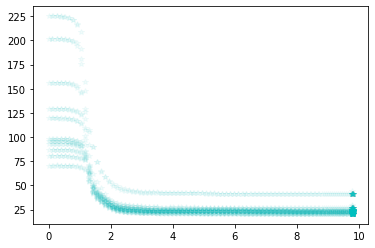

In [72]:
ants = [rdb.ants[i].name for i in range(58)]
ants.remove('m060')
ants.remove('m002')
ants.remove('m012')
ants.remove('m014')
ants.remove('m016')
ants.remove('m024')
ants.remove('m026')
ants.remove('m050')
ants.remove('m058')
rm = []
for index, ant in enumerate(ants):
    if temp[ant].min() < 0:
        rm.append(ant)
        temp.pop(ant)
    
    plot(angle[ant], temp[ant], "*c", alpha=0.05)
    
show()
print(rm)

['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm009', 'm010', 'm012', 'm013', 'm014', 'm015', 'm016', 'm018', 'm019', 'm020', 'm023', 'm024', 'm025', 'm026', 'm027', 'm029', 'm030', 'm031', 'm032', 'm034', 'm036', 'm038', 'm040', 'm041', 'm042', 'm045', 'm046', 'm047', 'm050', 'm051', 'm052', 'm054', 'm056', 'm058', 'm059', 'm060', 'm062']
['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm009', 'm010', 'm012', 'm013', 'm014', 'm015', 'm016', 'm018', 'm019', 'm020', 'm023', 'm024', 'm025', 'm026', 'm027', 'm029', 'm030', 'm031', 'm032', 'm036', 'm038', 'm040', 'm041', 'm042', 'm046', 'm047', 'm050', 'm051', 'm052', 'm054', 'm058', 'm059', 'm060']


KeyError: 'm002'

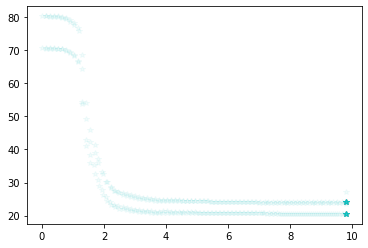

In [84]:
ants = [rdb.ants[i].name for i in range(58)]

rm =['m017', 'm022', 'm028', 'm033', 'm034', 'm035', 'm036', 'm037', 'm044', 'm045', 
     'm049', 'm053', 'm055', 'm056', 'm057', 'm061', 'm062', 'm063']
for index, ant in enumerate(ants):
    if ant in rm:
        ants.remove(ant)
print(ants)
ants.remove('m034')
ants.remove('m045')
ants.remove('m056')
ants.remove('m062')

print(ants)

for index, ant in enumerate(ants):
    plot(angle[ant], temp[ant], "*c", alpha=0.05)
show()

Q1 quantile :  22.805721282958984
Q2 quantile :  22.9534854888916
Q3 quantile :  24.180222511291504
The mean is :  22.953485


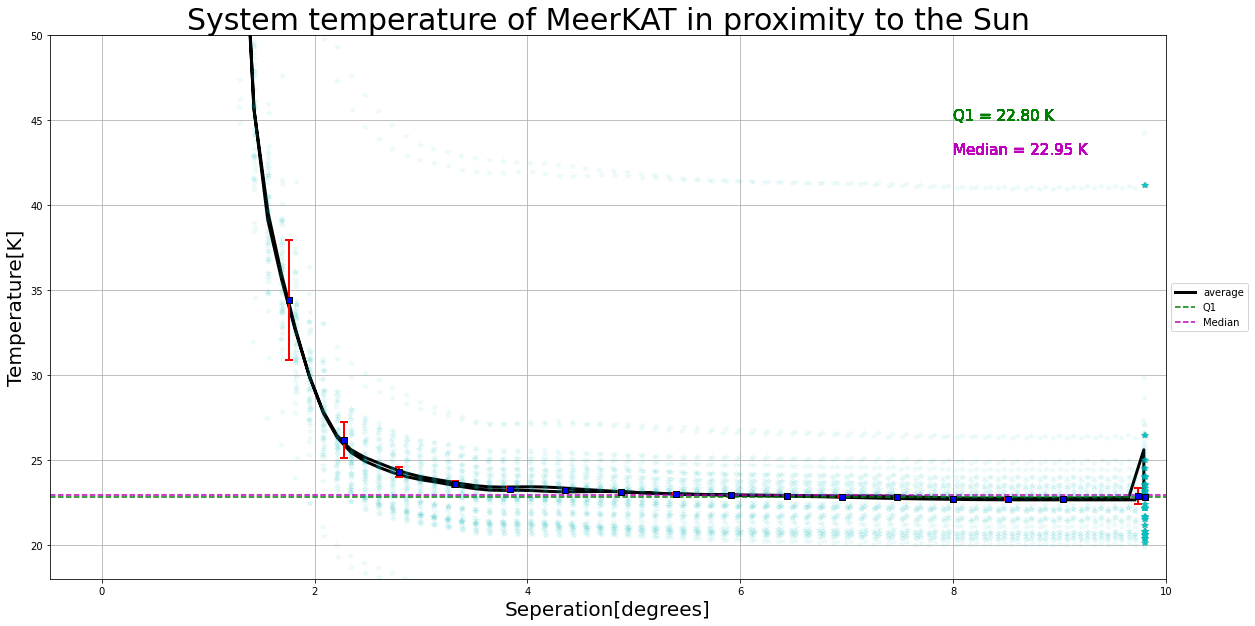

In [98]:

ants = [rdb.ants[i].name for i in range(58)]
rm =['m017', 'm022', 'm028', 'm033', 'm034', 'm035', 'm036', 'm037', 'm044', 'm045', 
     'm049', 'm053', 'm055', 'm056', 'm057', 'm061', 'm062', 'm063']
for index, ant in enumerate(ants):
    if ant in rm:
        ants.remove(ant)
ants.remove('m034')
ants.remove('m045')
ants.remove('m056')
ants.remove('m062')
ants.remove('m060')
ants.remove('m002')
ants.remove('m024')
ants.remove('m026')
ants.remove('m050')
ants.remove('m058')
ants.remove('m012')
ants.remove('m014')
ants.remove('m016')



q1 = np.quantile(mean_temp, .25)
print("Q1 quantile : ", q1) 
q2 = np.quantile(mean_temp, .50)
print("Q2 quantile : ", q2 ) 
q3 = np.quantile(mean_temp, .75)
print("Q3 quantile : ", q3)

figure(figsize=(20, 10))
subplots_adjust(hspace=0.5)

median_ = median(mean_temp)
print("The mean is : ", median_)
pol = 'h'

plot(mean_angle, mean_temp, "-k", label='average', linewidth=3)
errorbar(xv, yv, sv, fmt='ks',lw=2,capsize=4, capthick=2, zorder=3, mfc='b', mec='black',ecolor='r')
axhline(y = q1, color='g', linestyle='--', label="Q1")
axhline(y = q2, color='m', linestyle='--', label="Median")
#axhline(y = q3, color='y', linestyle='--', label="Q3")
for index, ant in enumerate(ants):
    plot(angle[ant], temp[ant], "*c", alpha=0.05)
    text(8, 45, 'Q1 = 22.80 K', fontsize = 15, color = 'g')
    text(8, 43, 'Median = 22.95 K', fontsize = 15, color = 'm')
    #text(8, 41, 'Q3 = 37.17 K', fontsize = 15, color = 'y')
#     fill_between(mean_angle, mean_temp-std_temp, mean_temp+std_temp,
#                  facecolor="orange", # The fill color
#                  color='blue',       # The outline color
#                  alpha=0.2)
    ylim(None, 50)
    xlim(None, 10)
    title('System temperature of MeerKAT in proximity to the Sun', fontsize=30)
    xlabel('Seperation[degrees]', fontsize=20)
    ylabel('Temperature[K]', fontsize=20)
    legend(loc='center left', bbox_to_anchor=(1, 0.5))
grid()
show()

KeyError: 'm024'

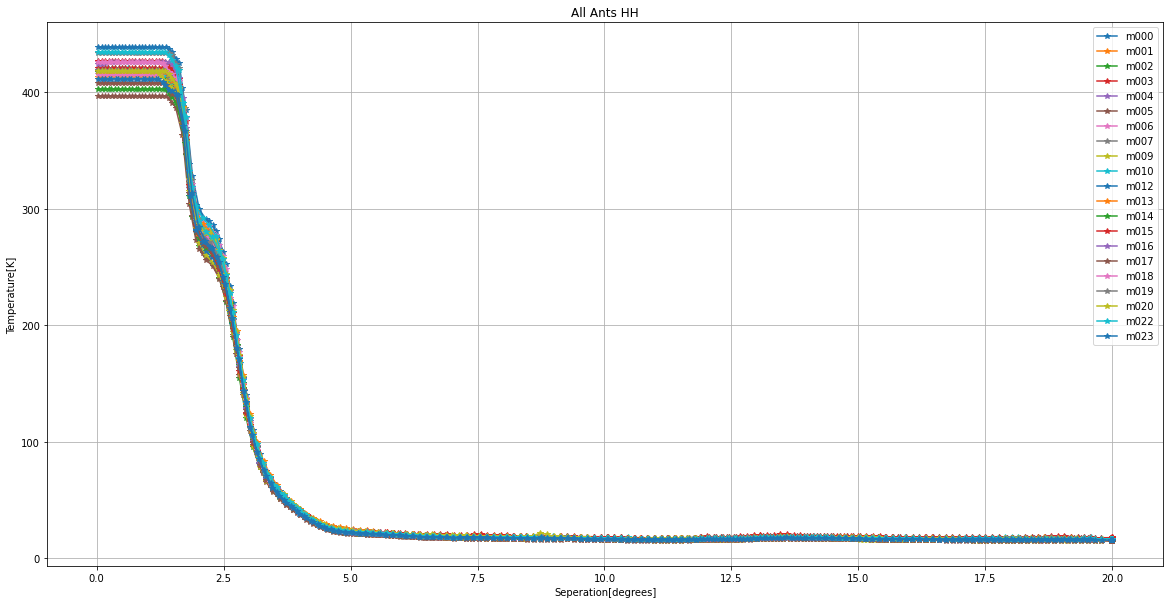

In [23]:
figure(figsize=(20, 10))
#subplots_adjust(hspace=0.5)
ants = rdb.ants
for index, ant in enumerate(ants):
    plot(angle[ant.name], temp[ant.name], "-*", label=ant.name)
    title('All Ants HH')
    xlabel('Seperation[degrees]')
    ylabel('Temperature[K]')
    legend(loc='upper right')
    grid()
show()





In [16]:
angle_sep = np.sqrt(np.sum((np.degrees(dataset.scans[0].target_coords))**2,axis=0))
temp = data_c.scans[0].pol("VV").mean(axis=1)

/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1396: UserWarning: kernel_size exceeds volume extent: the volume will be zero-padded.
  warnings.warn('kernel_size exceeds volume extent: the volume will be '


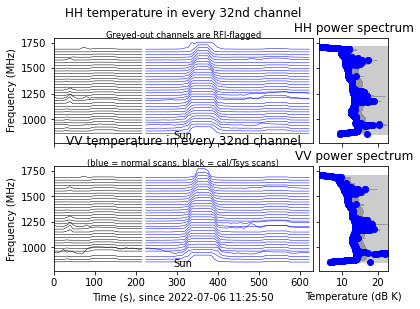

In [17]:
scape.plot_waterfall(data);

DEBUG: locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f77884c8f28>
DEBUG: Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f77884c8f28> on colorbar
DEBUG: Setting pcolormesh


Text(0, 0.5, 'Time (dumps)')

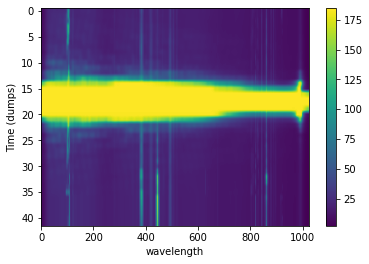

In [18]:
imshow(data_c.scans[0].pol("HH"), aspect='auto')
colorbar()
xlabel("wavelength")
ylabel("Time (dumps)")

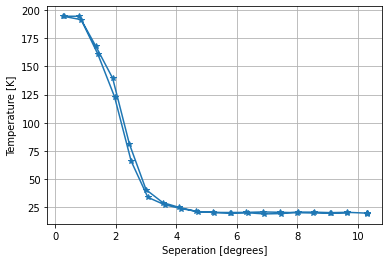

In [20]:
plot(angle_sep, temp, "-*")
xlabel('Seperation [degrees]')
ylabel('Temperature [K]')
grid()